In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Nested query
$\diamond$ `SELECT` block in the `WHERE` or `HAVING` clauses.

$\diamond$ Single `query` returns single or multiple values.

$\diamond$ Use result from the `inner` `query` to select the specific rows in another query.
### 1.1. `Nested query` in the `WHERE` clause

#### Step 1. Inner query

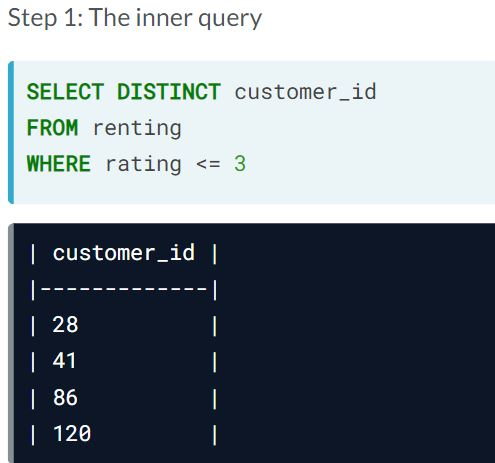

In [2]:
### 

$\qquad$ Hence, the result is equivalent to the `WHERE customer_id IN (28, 41, 86, 120)`

#### Step 2. `Outer query`

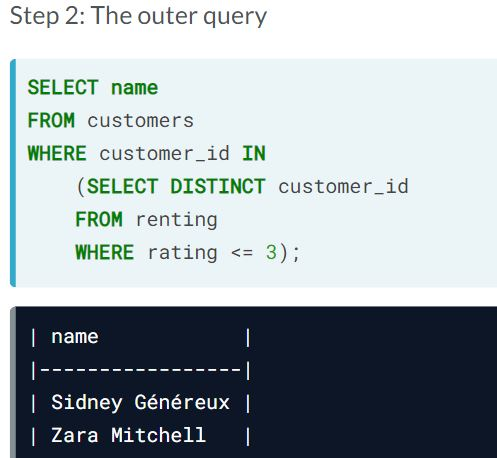

In [3]:
### 

### 1.2. `Nested query` in the `HAVING` clause
#### Step 1. `Inner query`

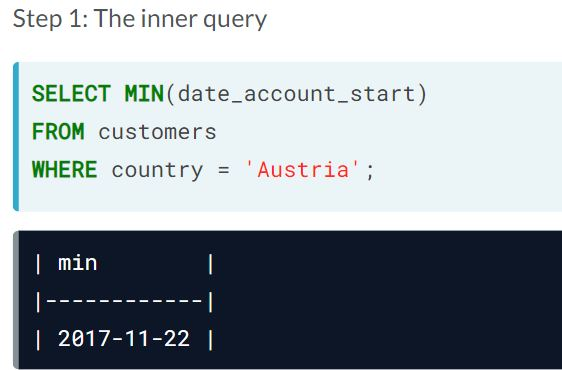

In [4]:
### 

#### Step 2. `Outer query`

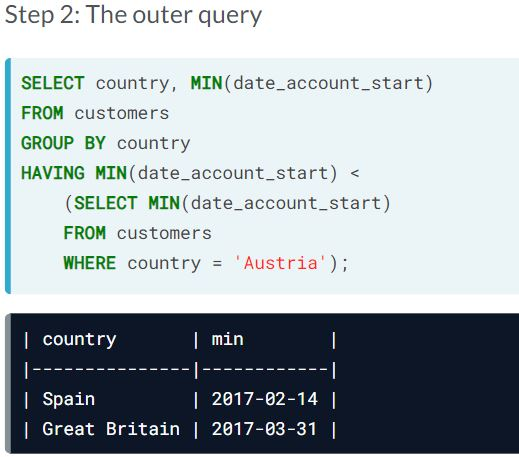

In [5]:
### 

#### Problems. Who are the `actors` in the `movie Ray`?

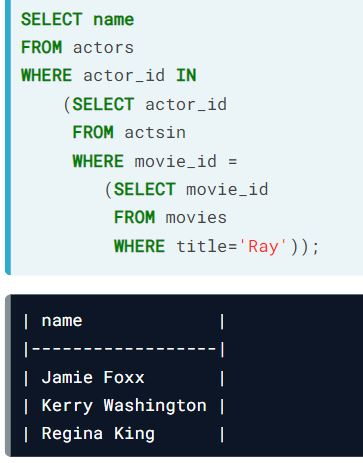

In [6]:
### 

### EXERCISE.
#### Exercise 1.1. Often rented movies
$\qquad$ Your manager wants you to make a list of movies excluding those which are hardly ever watched. This list of movies will be used for advertising. List all movies with more than 5 `views` using a nested query which is a powerful tool to implement selection conditions.

#### Instructions
**Step 1.** Select all movie `IDs` which have more than 5 `views`.

**SOLUTION.**

                SELECT movie_id -- Select movie IDs with more than 5 views
                FROM renting
                GROUP BY movie_id
                HAVING COUNT(*) > 5
**`query result`.**

|movie_id
|:-
|54
|29
|71
|68
|4
|34
|51
|...
|1
|5
|18
|64
|27
|23
58             

`(58 rows)`

**Step 2.** Select all information about movies with `more than 5 views`.

**SOLUTION.**

                SELECT *
                FROM movies
                WHERE movie_id IN ( -- Select movie IDs from the inner query
                                    SELECT movie_id
                                    FROM renting
                                    GROUP BY movie_id
                                    HAVING COUNT(*) > 5)
**`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
1|One Night at McCool's|Comedy|93|2001|2.09
2|Swordfish|Drama|99|2001|2.19
3|What Women Want|Comedy|127|2001|2.59
4|Training Day|Drama|122|2001|1.79
5|The Fellowship of the Ring|Science Fiction & Fantasy|178|2001|2.59
7|The Royal Tenenbaums|Comedy|110|2002|1.89
10|Simone|Drama|117|2002|2.69
...|...|...|...|...|...|...
68|The Company You Keep|Mystery & Suspense|125|2013|2.39
69|The Frozen Ground|Mystery & Suspense|105|2013|2.49
70|Captain Phillips|Drama|134|2013|1.59
71|Rio 2|Animation|101|2014|1.79

`(58 rows)`

**Comments.** You used a `nested query` to select all movies with `more than 5 views` and found out that `'One Night at McCool's'` is one of them.

#### Exercise 1.2. Frequent customers
$\qquad$ Report a list of customers who frequently rent movies on `MovieNow`.

#### Instructions
List all customer information for `customers` who **rented** `more than 10 movies`.

**SOLUTION.**

                SELECT * FROM customers
                WHERE customer_id IN ( -- Select all customers with more than 10 movie rentals
                                        SELECT customer_id
                                        FROM renting
                                        GROUP BY customer_id
                                        HAVING COUNT(*) > 10);
**`query result`.**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
21|Avelaine Corbeil|France|female|1986-03-17|2017-06-11
28|Sidney Généreux|France|male|1980-12-01|2017-02-04
49|Havasy Kristof|Hungary|male|1998-06-13|2017-01-18
92|Honorata Nowak|Poland|female|1986-05-02|2017-09-21
113|Lucy Centeno Barrios|Spain|female|1970-11-03|2017-06-13
114|Canela Gaona Lozano|Spain|female|1997-04-01|2017-02-14

`(6 rows)`

**Comments.** Well done! You identified Avelaine Corbeil from France as one of the customers who rented more than 10 movies.

#### Exercise 1.3.  Movies with rating above average
$\qquad$ For the advertising campaign your manager also needs a list of popular movies with high ratings. Report a list of movies with rating above average.

#### Instructions.
**Step 1.** Calculate the average over all ratings.

**SOLUTION.**

                    SELECT AVG(rating) FROM renting
**`result`.**

| avg|
|:-:|
|7.9390243902439024 |

**Step 2.** Select `movie IDs` and calculate the average rating of movies with rating above average.

**SOLUTION.**


                SELECT movie_id,  -- Select movie IDs and calculate the average rating 
                       AVG(rating)
                FROM renting
                GROUP BY movie_id
                HAVING AVG(rating) > (  -- Of movies with rating above average
                                        SELECT AVG(rating)
                                        FROM renting);
**`query result`.**

movie_id|avg
:-|:-
54|8.1666666666666667
29|8.0000000000000000
71|8.0000000000000000
34|8.0000000000000000
51|8.4285714285714286
...|...
64|8.2500000000000000
27|8.2857142857142857
23|8.0000000000000000
58|8.3333333333333333
8|8.0000000000000000

`(40 rows)`

**Step 3.** The advertising team only wants a `list of movie titles`. Report the movie titles of all movies with `average rating` higher than the `total average`.

**SOLUTION.**

                    SELECT title
                    FROM movies
                    WHERE movie_id IN ( 
                                        SELECT movie_id
                                        FROM renting
                                        GROUP BY movie_id
                                        HAVING AVG(rating) > (
                                                              SELECT AVG(rating)
                                                              FROM renting
                                                              )
                                            );
                        
- **`query result`.**

|title
|:-
What Women Want
The Fellowship of the Ring
Harry Potter and the Philosopher's Stone
The Royal Tenenbaums
Waking Up in Reno
...
Django Unchained
Cloud Atlas
Ghost Rider: Spirit of Vengeance
Rio 2

`(40 rows)`

- **Comments.** You selected all movies with an average rating higher than the total average and found out that the movie `'What Women Want'` is one of them.

## 2. Correlated `nested queries`
### `Correlated queries`.
$\qquad \diamond$ Condition in the `WHERE` clause of the `inner query`.

$\qquad \diamond$ References some column of a table in the `outer query`.

For example, number of the movie rental more than 5.

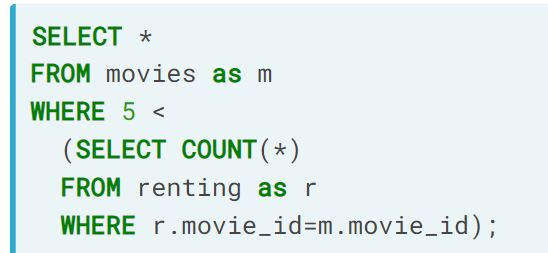

In [7]:
### 

### Evaluate
$\qquad \diamond$ Evaluate the **`inner query`**

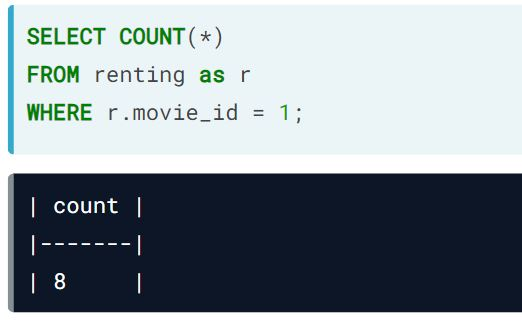

In [8]:
### 

$\qquad \diamond$ Evaluate the **`outer query`.** 

$\quad \qquad \bullet$ Number of the `movie rental` **larger than** 5.

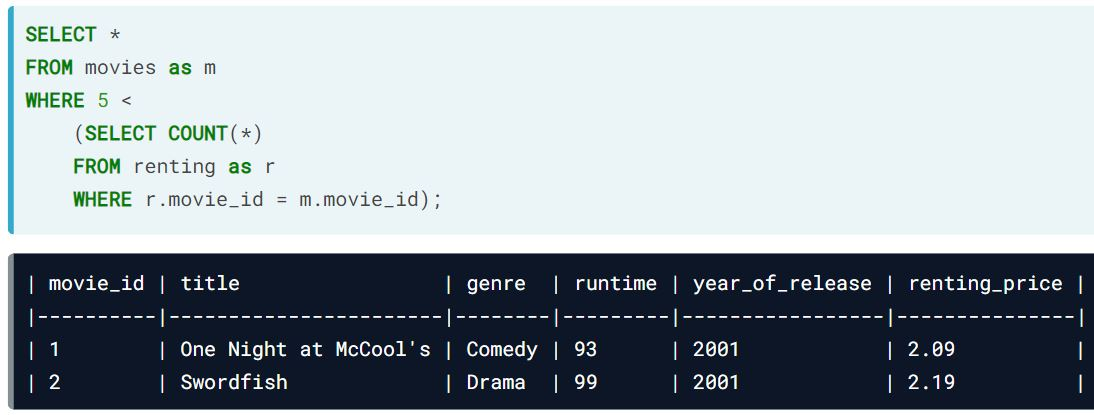

In [9]:
### 

$\quad \qquad \bullet$ Number of the `movie rental` **less than** 5.

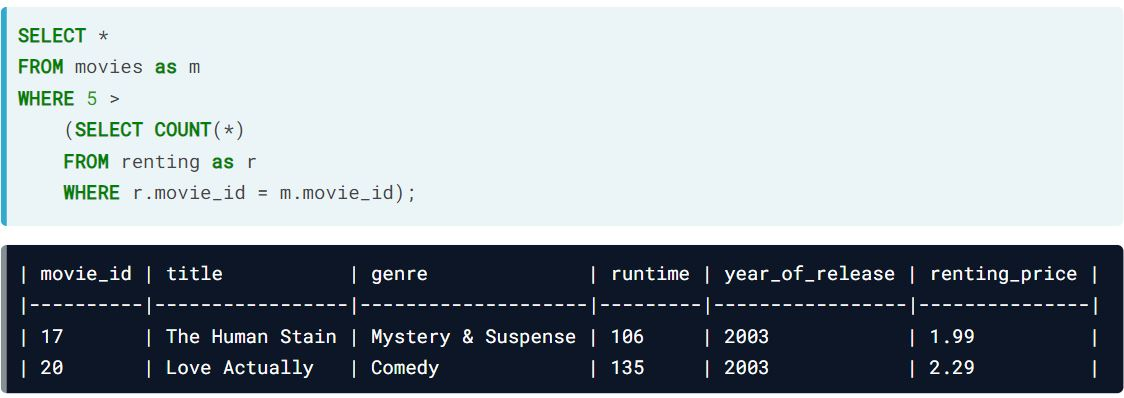

In [10]:
### 

### EXERCISEs.
#### Exercise 2.1. Analyzing customer behavior
$\qquad$ A new advertising campaign is going to focus on `customers` who rented fewer than 5 movies. 

$\qquad$ Use a `correlated query` to extract all customer information for the `customers` of `interest`.

#### Instructions.
**Step 1.** First, count number of `movie rentals` for `customer` with `customer_id = 45`. Give the table renting the alias `r`

**SOLUTION.**

                    SELECT COUNT(*) FROM renting
                    WHERE customer_id = 45
**`query result`.**

| count |
|:-:|
|5|

**Step 2.** Now select all columns from the `customer` table where the number of movie rentals is `smaller than 5`.

**SOLUTION.**

                    SELECT * FROM customers as c
                    WHERE 5 > (
                                SELECT count(*)
                                FROM renting as r
                                WHERE r.customer_id = c.customer_id);
**`query result`.**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
2|Wolfgang Ackermann|Austria|male|1971-11-17|2018-10-15
3|Daniela Herzog|Austria|female|1974-08-07|2019-02-14
4|Julia Jung|Austria|female|1991-01-04|2017-11-22
6|Rowanne Couperus|Belgium|female|1994-04-05|2018-08-26
9|Antal van Looij|Belgium|male|1982-06-18|2019-03-10
11|Yakup Mes|Belgium|male|1978-04-28|2019-02-19
...|...|...|...|...|...|...
117|Moira Jurado Paez|Spain|female|1996-01-30|2018-11-09
119|Lisa Ibarra Valadez|Spain|female|1998-12-08|2019-03-06
120|Robin J. Himes|USA|male|1988-11-30|2018-08-06
122|Thelma B. Coward|USA|female|1971-04-15|2018-11-27
123|Andrew J. Ramos|USA|male|1994-03-11|2018-12-30

`(66 rows)`


#### Exercise 2.2. Customers who gave low ratings
$\qquad$ Identify customers who were not satisfied with movies they watched on MovieNow. Report a list of customers with minimum rating smaller than 4.

#### Instructions
**Step 1.** Calculate the minimum rating of customer with `ID 7`.

**SOLUTION.**

                    SELECT MIN(rating) FROM renting
                    WHERE customer_id = 7

**`query result`.**

| count |
|:-:|
| 8 |

**Step 2.** Select all customers with a minimum rating smaller than 4. Use the `first letter` of the table as an alias.

**SOLUTION.**

                    SELECT * FROM customers AS c
                    WHERE 4 > ( -- Select all customers with a minimum rating smaller than 4 
                                SELECT MIN(rating)
                                FROM renting AS r
                                WHERE r.customer_id = c.customer_id);
**`query result`.**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
28|Sidney Généreux|France|male|1980-12-01|2017-02-04
41|Zara Mitchell|Great Britan|female|1994-07-08|2017-06-12
86|Albin Jaworski|Poland|male|1984-05-01|2017-12-15
120|Robin J. Himes|USA|male|1988-11-30|2018-08-06

`(4 rows)`

**Comments.** You found out that `Sidney Généreux`, `Zara Mitchell`, `Albin Jaworski`, and `Robin J. Himes` rated a movie with `less than 4`.

#### Exercise 2.3. Movies and ratings with `correlated queries`
Report a list of movies that received the `most attention on` the movie platform, (i.e. report all movies with more than 5 ratings and all movies with an average rating `higher than 8`).

#### Instructions.
**Step 1.** Select all movies with more than 5 ratings. Use the first letter of the table as an alias.

**SOLUTION.**

                SELECT * FROM movies AS m
                WHERE 5 < ( -- Select all movies with more than 5 ratings
                            SELECT COUNT(*)
                            FROM renting AS r
                            WHERE r.movie_id = m.movie_id);
**`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
4|Training Day|Drama|122|2001|1.79
10|Simone|Drama|117|2002|2.69
12|The Two Towers|Science Fiction & Fantasy|179|2002|2.39
14|The Recruit|Mystery & Suspense|115|2003|1.69
22|Imagining Argentina|Art House & International|107|2004|2.59
23|Shall We Dance|Drama|106|2004|1.69
25|Bridget Jones - The Edge of Reason|Drama|108|2004|2.89
27|Monster|Drama|109|2004|2.09
28|Harry Potter and the Prisoner of Azkaban|Science Fiction & Fantasy|142|2004|1.69
29|Two for the Money|Drama|122|2005|2.79
34|Failure to Launch|Drama|97|2006|1.99
36|World Trade Center|Drama|129|2006|1.59
40|Then She Found Me|Drama|100|2007|1.99
41|The Kingdom|Drama|110|2007|2.09
44|Harry Potter and the Order of the Phoenix|Science Fiction & Fantasy|138|2007|2.49
45|Burn After Reading|Drama|96|2008|2.39
49|Harry Potter and the Half-Blood Prince|Science Fiction & Fantasy|153|2009|1.59
50|Winter's Bone|Drama|100|2010|2.69
51|Morning Glory|Comedy|107|2010|2.99
52|Fair Game|Drama|108|2010|2.89
54|Harry Potter and the Deathly Hallows – Part 1|Science Fiction & Fantasy|146|2010|2.79
57|Young Adult|Drama|94|2011|1.99
61|Harry Potter and the Deathly Hallows – Part 2|Science Fiction & Fantasy|130|2011|1.99
63|Django Unchained|Other|165|2012|2.69
 
`(24 rows)`

**Step 2.** Select all movies with an average rating higher than 8.

**SOLUTION.**

                        SELECT * FROM movies AS m
                        WHERE 8 < ( -- Select all movies with an average rating higher than 8
                                    SELECT AVG(rating)
                                    FROM renting AS r
                                    WHERE r.movie_id = m.movie_id);
**`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
3|What Women Want|Comedy|127|2001|2.59
5|The Fellowship of the Ring|Science Fiction & Fantasy|178|2001|2.59
6|Harry Potter and the Philosopher's Stone|Science Fiction & Fantasy|152|2001|2.69
9|11'09''01 September 11|Drama|134|2002|2.99
16|25th Hour|Drama|135|2003|1.59
18|Secondhand Lions|Drama|111|2003|1.69
22|Imagining Argentina|Art House & International|107|2004|2.59
24|Welcome to Mooseport|Comedy|110|2004|2.89
26|Ray|Drama|152|2004|2.59
27|Monster|Drama|109|2004|2.09
33|V for Vendetta|Drama|132|2006|1.59
38|The Lake House|Drama|99|2006|2.49
40|Then She Found Me|Drama|100|2007|1.99
42|No Country for Old Men|Drama|122|2007|1.49
47|Fool's Gold|Action & Adventure|112|2008|2.69
48|Astro Boy|Action & Adventure|94|2009|2.89
49|Harry Potter and the Half-Blood Prince|Science Fiction & Fantasy|153|2009|1.59
51|Morning Glory|Comedy|107|2010|2.99
54|Harry Potter and the Deathly Hallows – Part 1|Science Fiction & Fantasy|146|2010|2.79
57|Young Adult|Drama|94|2011|1.99
58|The Help|Drama|146|2011|2.49
60|Black Death|Drama|102|2011|2.69
62|The Sessions|Drama|95|2012|2.29
63|Django Unchained|Other|165|2012|2.69
64|Cloud Atlas|Drama|172|2012|2.89
65|Ghost Rider: Spirit of Vengeance|Action & Adventure|96|2012|1.79

`(26 rows)`

**Comments.** 

$\quad \diamond$ You use `correlated queries` to figure out that the comedy `'What women want'` has an `average rating` `higher than 8`. 

$\quad \diamond$ Note, that **you didn't need to use a `GROUP BY` clause to answer this `request`**.

## 3. Queries with `EXISTS`
### The `EXISTS` command; 
#### Features.
$\qquad \diamond$ Special case of a `correlated nested query`

$\qquad \diamond$ Use to **check** if the **result** of the `correlated nested query` **is empty**

$\qquad \diamond$ It returns `TRUE` or `FALSE` only, where

$\quad\qquad \bullet$ **`TRUE`** meant **not empty**.

$\quad\qquad \bullet$ **`FALSE`** meant **empty**.

$\qquad \diamond$ The columns specified in the `SELECT` component not considered - use `SELECT *`

#### PROBLEM. `movies` with `at least` one rating.

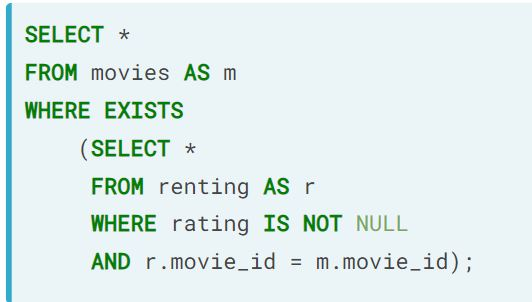

In [11]:
### 

$\qquad$ **Example 1.** Considering `movie_id = 11`

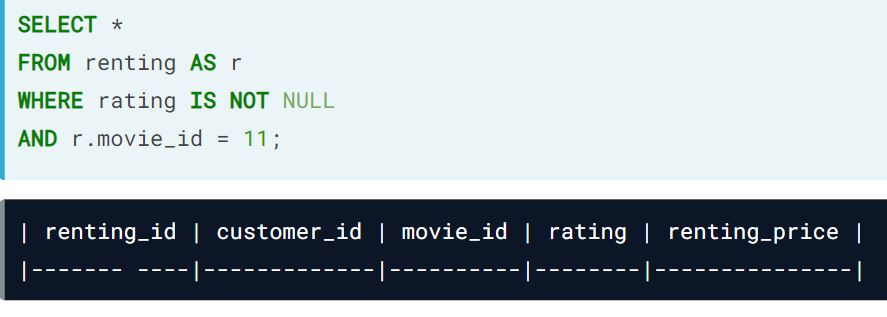

In [12]:
### 

$\qquad$ **Example 2.** Considering `movie_id = 1`

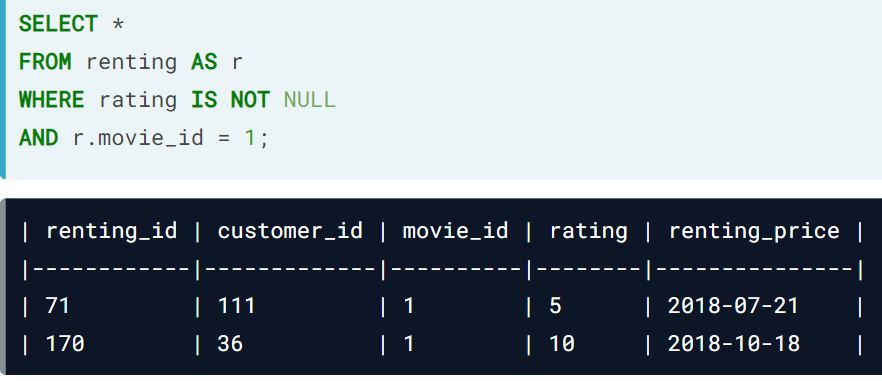

In [13]:
### 

#### `EXIST` query with result.

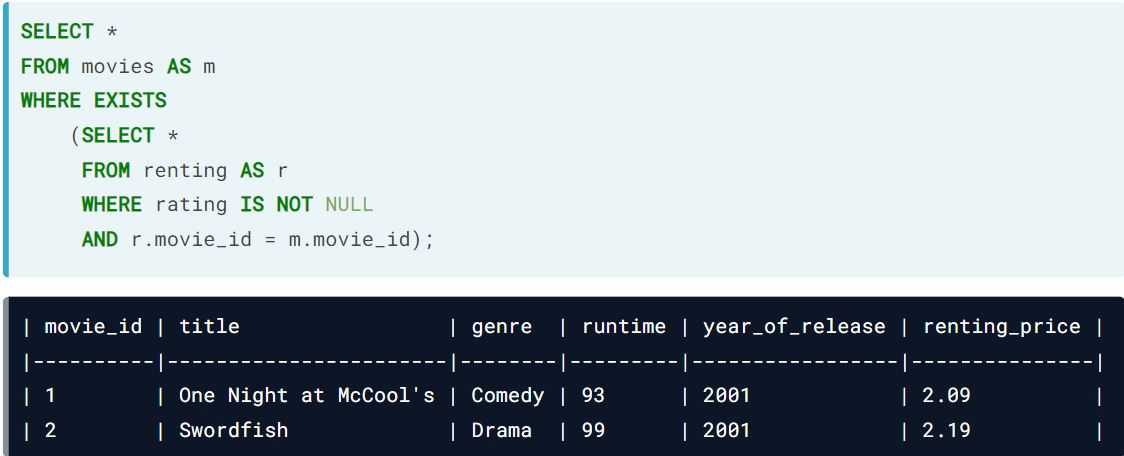

In [14]:
### 

### `NOT EXISTS`
$\qquad$ Returns = **`TRUE`** meant `table is empty`

$\qquad \qquad \Rightarrow$ **`The row of the outer query is selected`!**

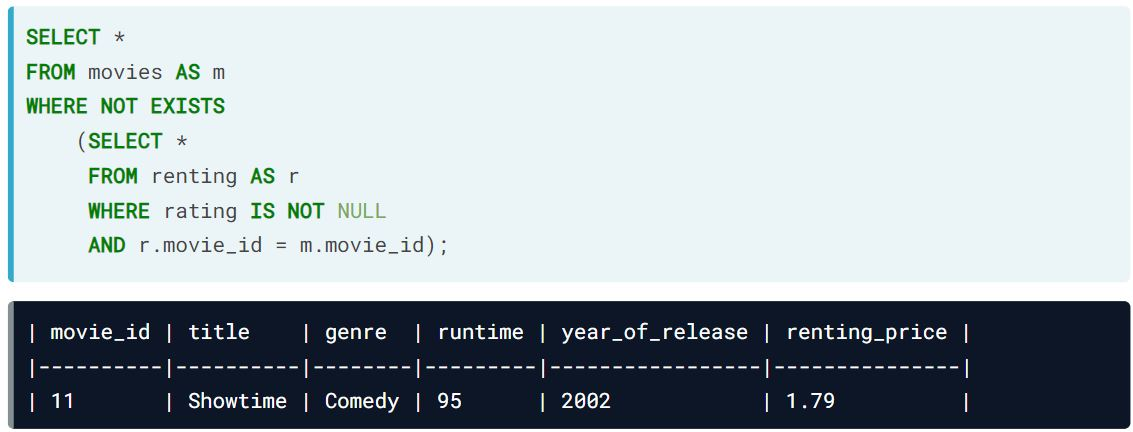

In [15]:
### 

### EXERCISE.
#### Exercise 3.1. Customers with at least one rating
$\qquad$ Having `active customers` is a key performance indicator for `MovieNow`. Make a list of `customers` who gave at least `one rating`.

#### Instructions.
**Step 1.** Select all records of movie rentals from customer with `ID 115`.

**SOLUTION.**

                    SELECT * FROM customers
                    WHERE customer_id = 115
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
245|115|69|null|2019-04-24
395|115|11|null|2019-04-07
498|115|42|null|2019-03-16

`(3 rows)`

**Step 2.** Select all records of movie rentals from the customer with ID `115` and **exclude** records with `null ratings`.

**SOLUTION.**

                SELECT * FROM renting
                WHERE rating IS NOT NULL -- Exclude those with null ratings
                AND customer_id = 115;

**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-

`(0 rows)`

**Step 3.** Select all records of movie rentals from the customer with `ID 1`, excluding `null ratings`.

**SOLUTION.**

                    SELECT * FROM renting
                    WHERE rating IS NOT NULL -- Exclude null ratings
                    AND customer_id = 1; -- Select all ratings from customer with ID 1
**`query result`.**

renting_id|customer_id|movie_id|rating|date_renting
:-|:-|:-|:-|:-
421|1|71|10|2019-01-21
520|1|39|6|2018-12-29

**Step 4.** Select all customers with at least one rating. Use the first letter of the table as an alias.

**SOLUTION.**

                SELECT * FROM customers AS c -- Select all customers with at least one rating
                WHERE EXISTS ( SELECT *
                                FROM renting AS r
                                WHERE rating IS NOT NULL 
                                AND r.customer_id = c.customer_id );
**`query result`.**

customer_id|name|country|gender|date_of_birth|date_account_start
:-|:-|:-|:-|:-|:-
2|Wolfgang Ackermann|Austria|male|1971-11-17|2018-10-15
4|Julia Jung|Austria|female|1991-01-04|2017-11-22
7|Annelous Sneep|Belgium|female|1993-11-14|2018-05-12
8|Jaëla van den Dolder|Belgium|female|1990-08-31|2018-02-08
10|Arnout Veenhuis|Belgium|male|1984-07-26|2017-01-28
...|...|...|...|...|
116|Maciela Casillas Peralta|Spain|female|1991-03-30|2017-12-10
118|Digna Mateo Carrasquill|Spain|female|1978-11-01|2017-11-24
119|Lisa Ibarra Valadez|Spain|female|1998-12-08|2019-03-06
120|Robin J. Himes|USA|male|1988-11-30|2018-08-06
123|Andrew J. Ramos|USA|male|1994-03-11|2018-12-30

`(103 rows)`


**Comments.** You found out that `customer 115` gave `no ratings` and `customer 1` gave `two ratings`. Then you selected all customers where the table of ratings is not empty.

#### Exercise 3.2. Actors in `comedies`
$\qquad$ In order to analyze the diversity of actors in comedies, first, report a list of actors who play in comedies and then, the number of actors for each nationality playing in comedies.

#### Instructions
**Step 1.** Select the records of all actors who play in a `Comedy`. Use the first letter of the table as an alias.

**SOLUTION.**

                    SELECT * FROM actsin AS ai -- Select the records of all actors who play in a Comedy
                    LEFT JOIN movies AS m
                        ON ai.movie_id = m.movie_id
                    WHERE m.genre = 'Comedy';
**`query result`.**

actsin_id|movie_id|actor_id|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-
2|56|2|56|Jack and Jill|Comedy|91|2011|2.09
6|56|3|56|Jack and Jill|Comedy|91|2011|2.09
9|7|6|7|The Royal Tenenbaums|Comedy|110|2002|1.89
17|20|14|20|Love Actually|Comedy|135|2003|2.29
28|8|23|8|Waking Up in Reno|Comedy|91|2002|2.59
...|...|...|...|...|...|...|...|...
166|51|112|51|Morning Glory|Comedy|107|2010|2.99
168|24|114|24|Welcome to Mooseport|Comedy|110|2004|2.89
171|11|117|11|Showtime|Comedy|95|2002|1.79
175|11|119|11|Showtime|Comedy|95|2002|1.79

`(30 rows)`

**Step 2.** Make a table of the records of actors who play in a Comedy and select only the actor with `ID 1`.

**SOLUTION.**

                    SELECT * FROM actsin AS ai
                    LEFT JOIN movies AS m
                        ON m.movie_id = ai.movie_id
                    WHERE m.genre = 'Comedy' AND ai.actor_id = 1
**`query result`.**

actsin_id|movie_id|actor_id|movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-|:-|:-|:-


`(0 rows)`

**Step 3.** Create a list of all actors who play in a Comedy. Use the first letter of the table as an alias.

**SOLUTION.**

                    SELECT * FROM actors AS a
                    WHERE EXISTS
                        (SELECT *
                         FROM actsin AS ai
                         LEFT JOIN movies AS m
                            ON m.movie_id = ai.movie_id
                         WHERE m.genre = 'Comedy' AND ai.actor_id = a.actor_id);
**`query result`.**

actor_id|name|year_of_birth|nationality|gender
:-|:-|:-|:-|:-
2|Adam Sandler|1966|USA|male
3|Al Pacino|1940|USA|male
6|Anjelica Huston|1951|USA|female
23|Charlize Theron|1975|South Africa|female
...|...|...|...|...|...
110|Paul Reiser|1956|USA|male
112|Rachel McAdams|1978|Canada|female
114|Ray Romano|1957|USA|male
117|Rene Russo|1954|USA|female
119|Robert De Niro|1943|USA|male

`(28 rows)`

**Step 4.** Report the nationality and the number of actors for each nationality.

**SOLUTION.**

            SELECT a.nationality, COUNT(*) -- Report the nationality and the number of actors for each nationality
            FROM actors AS a
            WHERE EXISTS
                (SELECT ai.actor_id
                 FROM actsin AS ai
                 LEFT JOIN movies AS m
                     ON m.movie_id = ai.movie_id
                 WHERE m.genre = 'Comedy'
                     AND ai.actor_id = a.actor_id)
            GROUP BY a.nationality;
**`query result`.**

nationality|count
:-|:-
Northern Ireland|1
USA|22
South Africa|1
Canada|1
British|3        

`(5 rows)`

**Comments.** You found out that there is one actor each coming from `South Africa`, `Canada` and `Northen Ireland`, three actors from `Great Britain`, and 22 from the `USA` who played in a `Comedy`.

## 4. Queries with `UNION` and `INTERSECT`.
The basic theory of `UNION` and `INTRESECT` in `PostgresSQL` has been mentioned in the course [Set_theory clauses](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Joining%20data%20in%20SQL/set-theory-clauses.ipynb)

$\qquad \diamond$ **`UNION` of 2 `queries`**

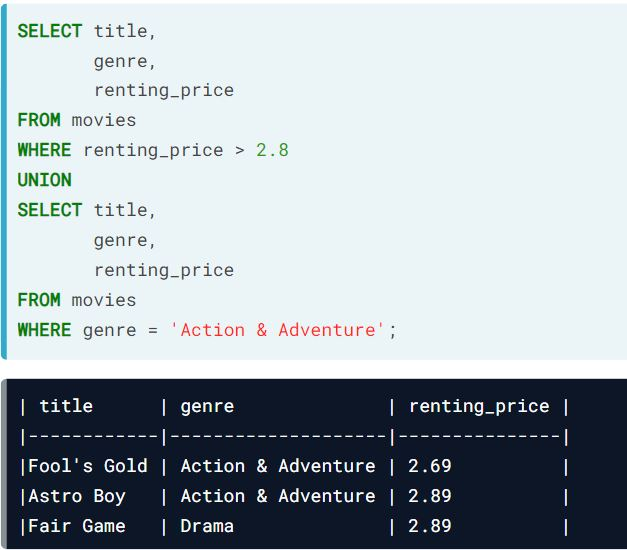

In [16]:
### 

$\qquad \diamond$ **`UNION` of 2 `queries`**

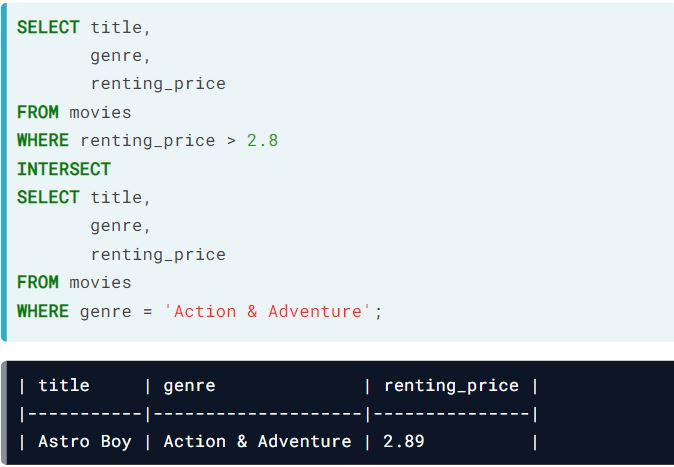

In [17]:
### 

### EXERCISE
#### Exercise 4.1. `Young actors` not coming from the USA
$\qquad$ As you've just seen, the operators `UNION` and `INTERSECT` are powerful tools when you work with two or more tables. Identify `actors` who are not from the `USA` and actors who were born `after 1990`.

#### Instructions.
**Step 1.** Report the `name`, `nationality` and the `year of birth` of all `actors` who are ***not from the `USA`***.

**SOLUTION.**

                        SELECT name,  -- Report the name, nationality and the year of birth
                               nationality, 
                               year_of_birth
                        FROM actors
                        WHERE nationality <> 'USA'; -- Of all actors who are not from the USA
                                                    -- you can also use the symbol (!=) instead the (<>)
**`query result`.**

name|nationality|year_of_birth
:-|:-|:-
Abbie Cornish|Australia|1982
Andrea Riseborough|British|1981
Anthony Hopkins|British|1937
Barkhad Abdi|Somalia|1985
Barry Pepper|Canada|1970
...|...|...
Sean Bean|British|1959
Shohreh Aghdashloo|Iran|1952
Stephen Rea|Ireland|1946
Tom Wilkinson|British|1948
Violante Placido|Italy|1976

`(52 rows)`

**Step 2.** Report the `name`, `nationality` and the `year of birth` of all actors who were born after 1990.

**SOLUTION.**

                        SELECT name, 
                               nationality, 
                               year_of_birth
                        FROM actors
                        WHERE year_of_birth > 1990; -- Born after 1990
**`query result`.**

name|nationality|year_of_birth
:-|:-|:-
Annasophia Robb|USA|1993
Freddie Highmore|British|1992
Josh Hutcherson|USA|1992

`(3 rows)`

**Step 3.** Select all actors who are `not from the USA` and all actors who are `born after 1990`.

**SOLUTION.**

                SELECT name, 
                       nationality, 
                       year_of_birth
                FROM actors
                WHERE nationality <> 'USA'
                UNION -- Select all actors who are not from the USA and all actors who are born after 1990
                SELECT name, 
                       nationality, 
                       year_of_birth
                FROM actors
                WHERE year_of_birth > 1990;

**`query result`.**

name|nationality|year_of_birth
:-|:-|:-
Cate Blanchett|Australia|1969
Julie Christie|British|1940
Emma Watson|British|1990
Sean Bean|British|1959
Freddie Highmore|British|1992
Eddie Redmayne|British|1982
Ian McKellen|British|1939
...|...|...
Rupert Grint|British|1988
Hector Bordoni|Argentina|1965
Hugh Grant|British|1960
Andrea Riseborough|British|1981
Sam Riley|British|1980

`(54 rows)`

**Step 4.** Select all actors who are `not from the USA` **and** who **are also** `born after 1990`.

**SOLUTION.**

                SELECT name, 
                       nationality, 
                       year_of_birth
                FROM actors
                WHERE nationality <> 'USA'
                INTERSECT -- Select all actors who are not from the USA and who are also born after 1990
                SELECT name, 
                       nationality, 
                       year_of_birth
                FROM actors
                WHERE year_of_birth > 1990;
**`query result`.**

name|nationality|year_of_birth
:-|:-|:-
Freddie Highmore|British|1992

`(1 rows)`

**Comments.** You identified `Freddie Highmore` as the only actor who is `not from the USA` and `born after 1990`.

#### Exercise 4.2. `Dramas` with `high ratings`
$\qquad$ The advertising team has a new focus. They want to draw the `attention` of the customers to `dramas`. Make a list of all movies that are in the drama genre and have an `average rating higher than 9`.

#### Instructions.
**Step 1.** Select the `IDs` of all `dramas`.

**SOLUTION.**

                    SELECT movie_id FROM movies
                    WHERE genre = 'Drama'
**`query result`.**

|movie_id
|:-
2
4
9
10
16
...
60
62
64
66
67
70

`(36 rows)`

**Step 2.** Select the IDs of all movies with `average rating` `higher than 9`.

**SOLUTION.**

                    SELECT movie_id -- Select the IDs of all movies with average rating higher than 9
                    FROM renting
                    GROUP BY movie_id
                    HAVING AVG(rating) > 9;
**`query result`.**

|movie_id
|:-
63
42
48
5

`(4 rows)`

**Step 3.** Select the `IDs` of all dramas with average rating higher than 9.

**SOLUTION.**

                    SELECT movie_id FROM movies
                    WHERE genre = 'Drama'
                    
                    INTERSECT  -- Select the IDs of all dramas with average rating higher than 9
                    
                    SELECT movie_id FROM renting
                    GROUP BY movie_id
                    HAVING AVG(rating)>9;
**`query result`.**

|movie_id
|:-
42

`(1 rows)`

**Step 4** Select all movies of in the `drama genre` with an `average rating` `higher than 9`.

**SOLUTION.**

                SELECT * FROM movies
                WHERE movie_id IN -- Select all movies of genre drama with average rating higher than 9
                           (SELECT movie_id FROM movies
                            WHERE genre = 'Drama'

                            INTERSECT

                            SELECT movie_id FROM renting
                            GROUP BY movie_id
                            HAVING AVG(rating) > 9);
**`query result`.**

movie_id|title|genre|runtime|year_of_release|renting_price
:-|:-|:-|:-|:-|:-
42|No Country for Old Men|Drama|122|2007|1.49

`(1 rows)`

**Comments.** Well done! You reported to the advertisment team that `'No Country for Old Men'` is the only drama with average rating higher than 9.